#Bibliotecas
## manipulação dos dados

In [52]:
import pandas as pd


## Visualização

In [53]:
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns
 

# Machine Lean

In [104]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.linear_model import LinearRegression

#Definições


In [54]:
df = pd.read_csv("KAG_energydata_complete.csv")

In [55]:
type(df)


pandas.core.frame.DataFrame

## Definição das colunas

# date time year-month-day hour:minute:second
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
## rv2, Random variable 2, nondimensional

# Programação dos dados


In [56]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [57]:
df.tail(5)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [58]:
df.columns




Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [59]:
df[ "RH_out"] #, "'Windspeed",
       #"'Visibility", "Tdewpoint", "rv1", "'rv2"]


0        92.000000
1        92.000000
2        92.000000
3        92.000000
4        92.000000
           ...    
19730    55.666667
19731    56.000000
19732    56.333333
19733    56.666667
19734    57.000000
Name: RH_out, Length: 19735, dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [61]:
df.rename(columns={"lights" : "Luzes aux","Appliances":"Eletro" }, inplace=True)


In [62]:
df.head(10)


,date,Eletro,Luzes aux,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [63]:
df.describe() ## Estatistica


,Eletro,Luzes aux,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Dados faltantes


In [64]:
df.isnull().sum()

date           0
Eletro         0
Luzes aux      0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## visualização de dados faltantes

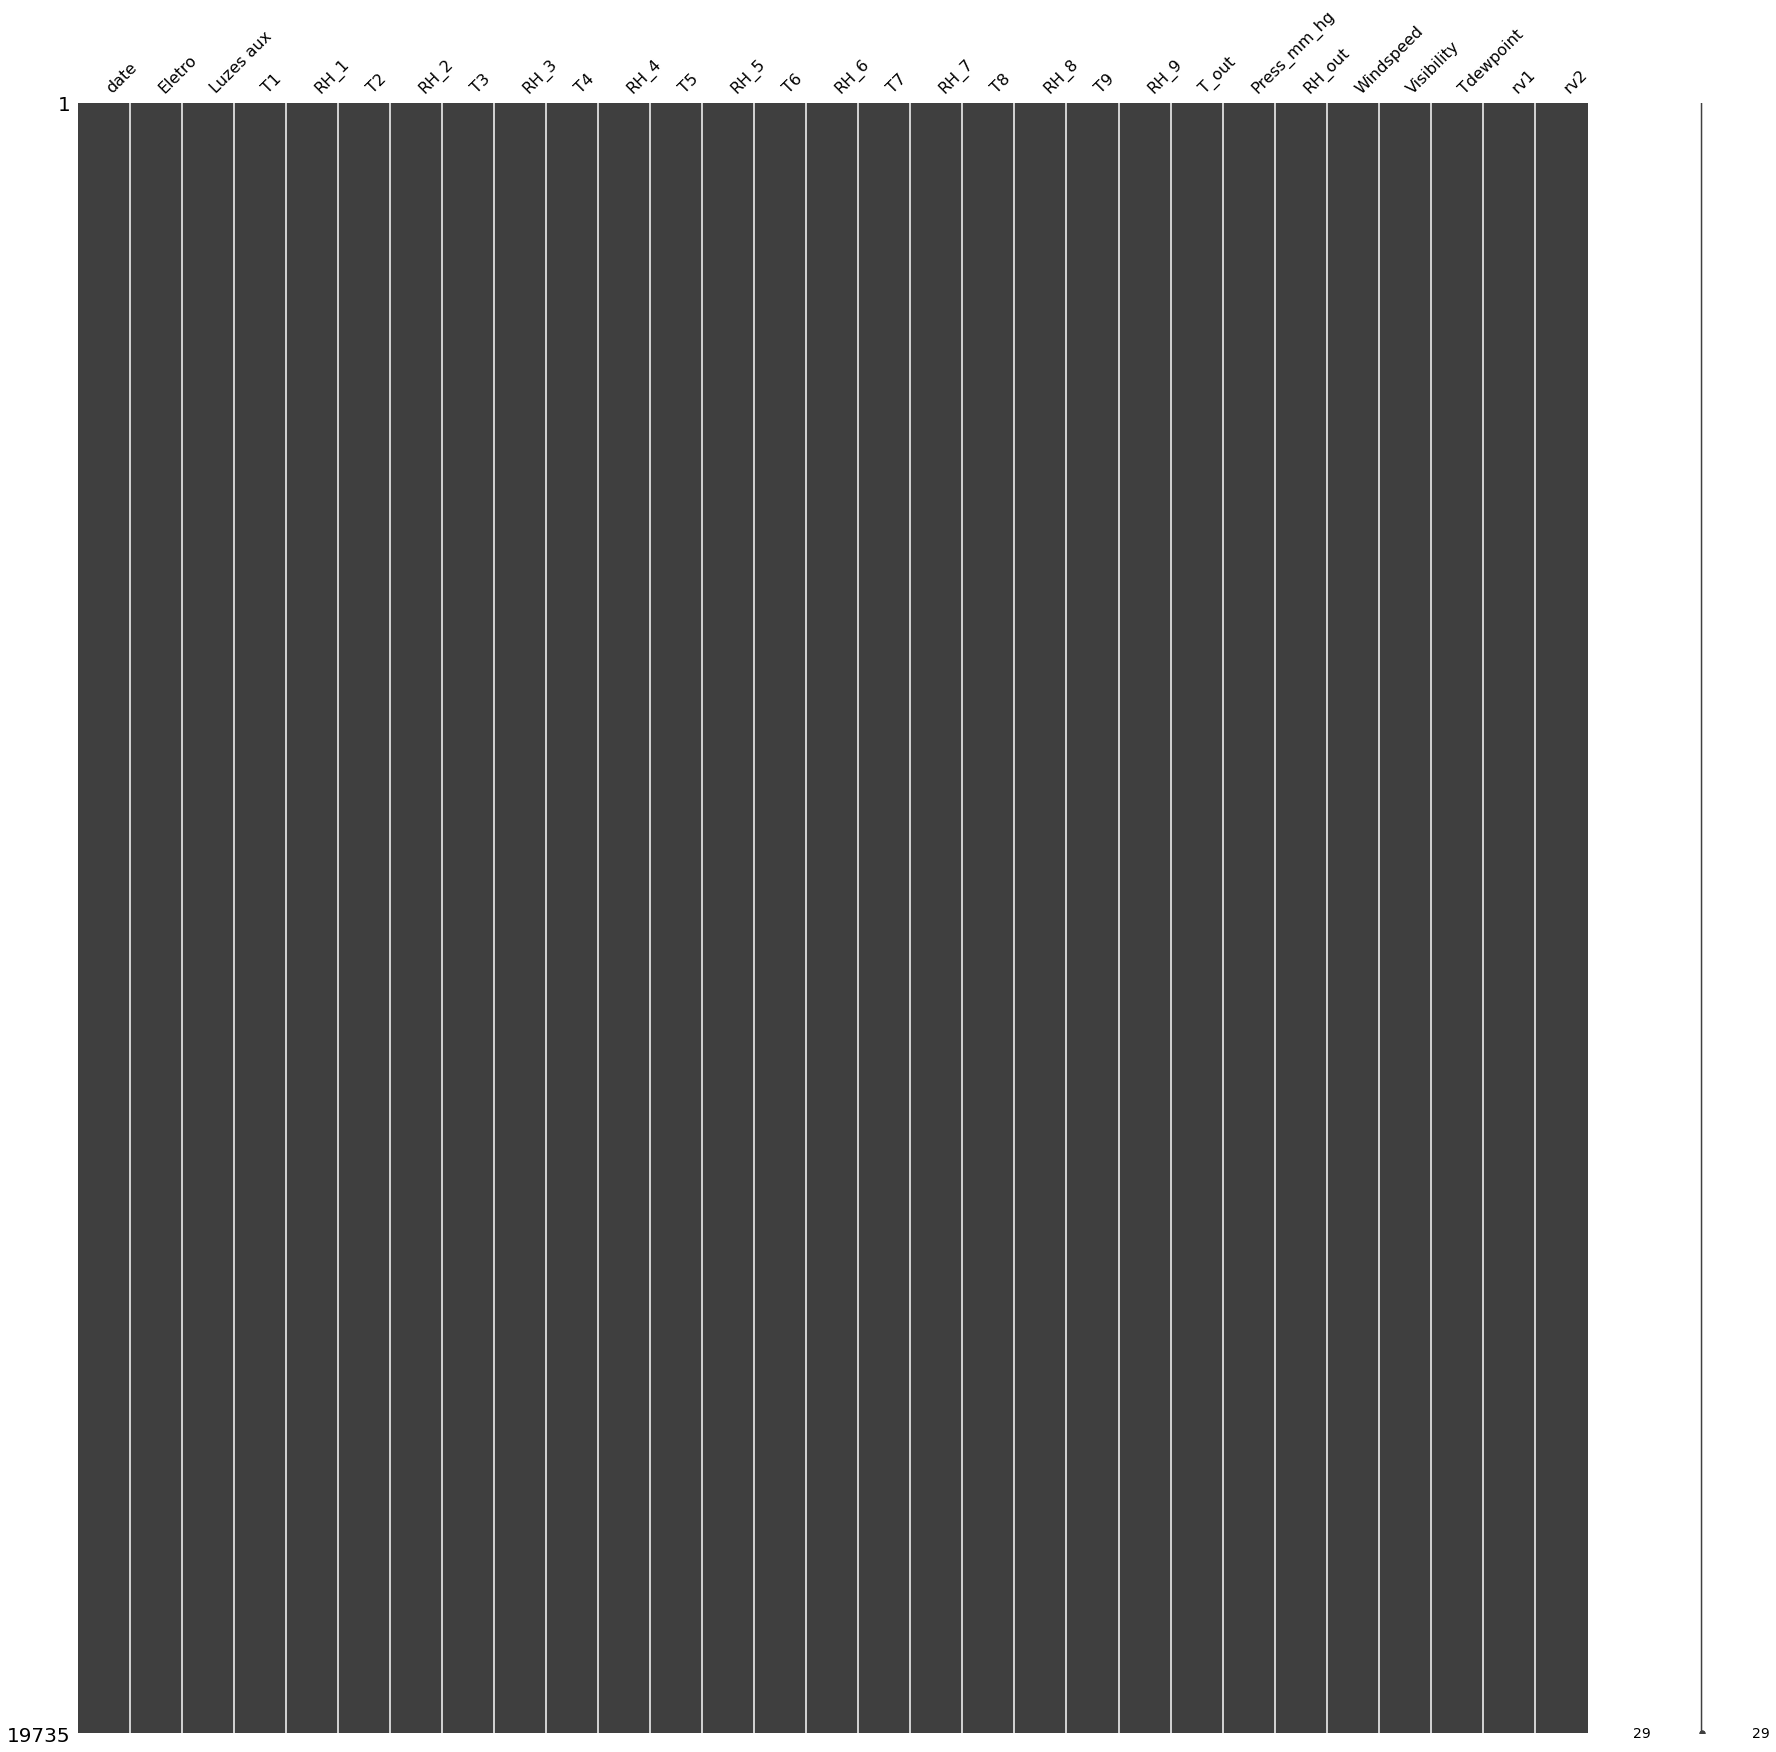

In [65]:
miss.matrix(df, figsize=(30,30))

## outlines 

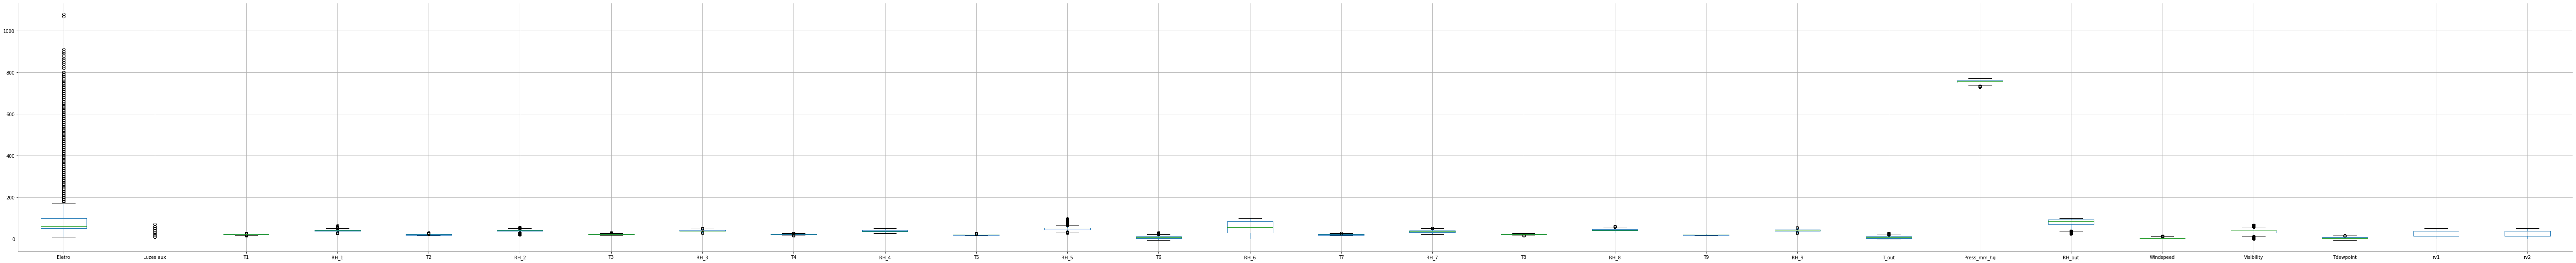

In [66]:
plt.figure(figsize=(100,10))
df.boxplot()
plt.show()


#  verificar duplicidade

In [67]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19730    False
19731    False
19732    False
19733    False
19734    False
Length: 19735, dtype: bool



---



## Correlação para avarição dos dados releantes

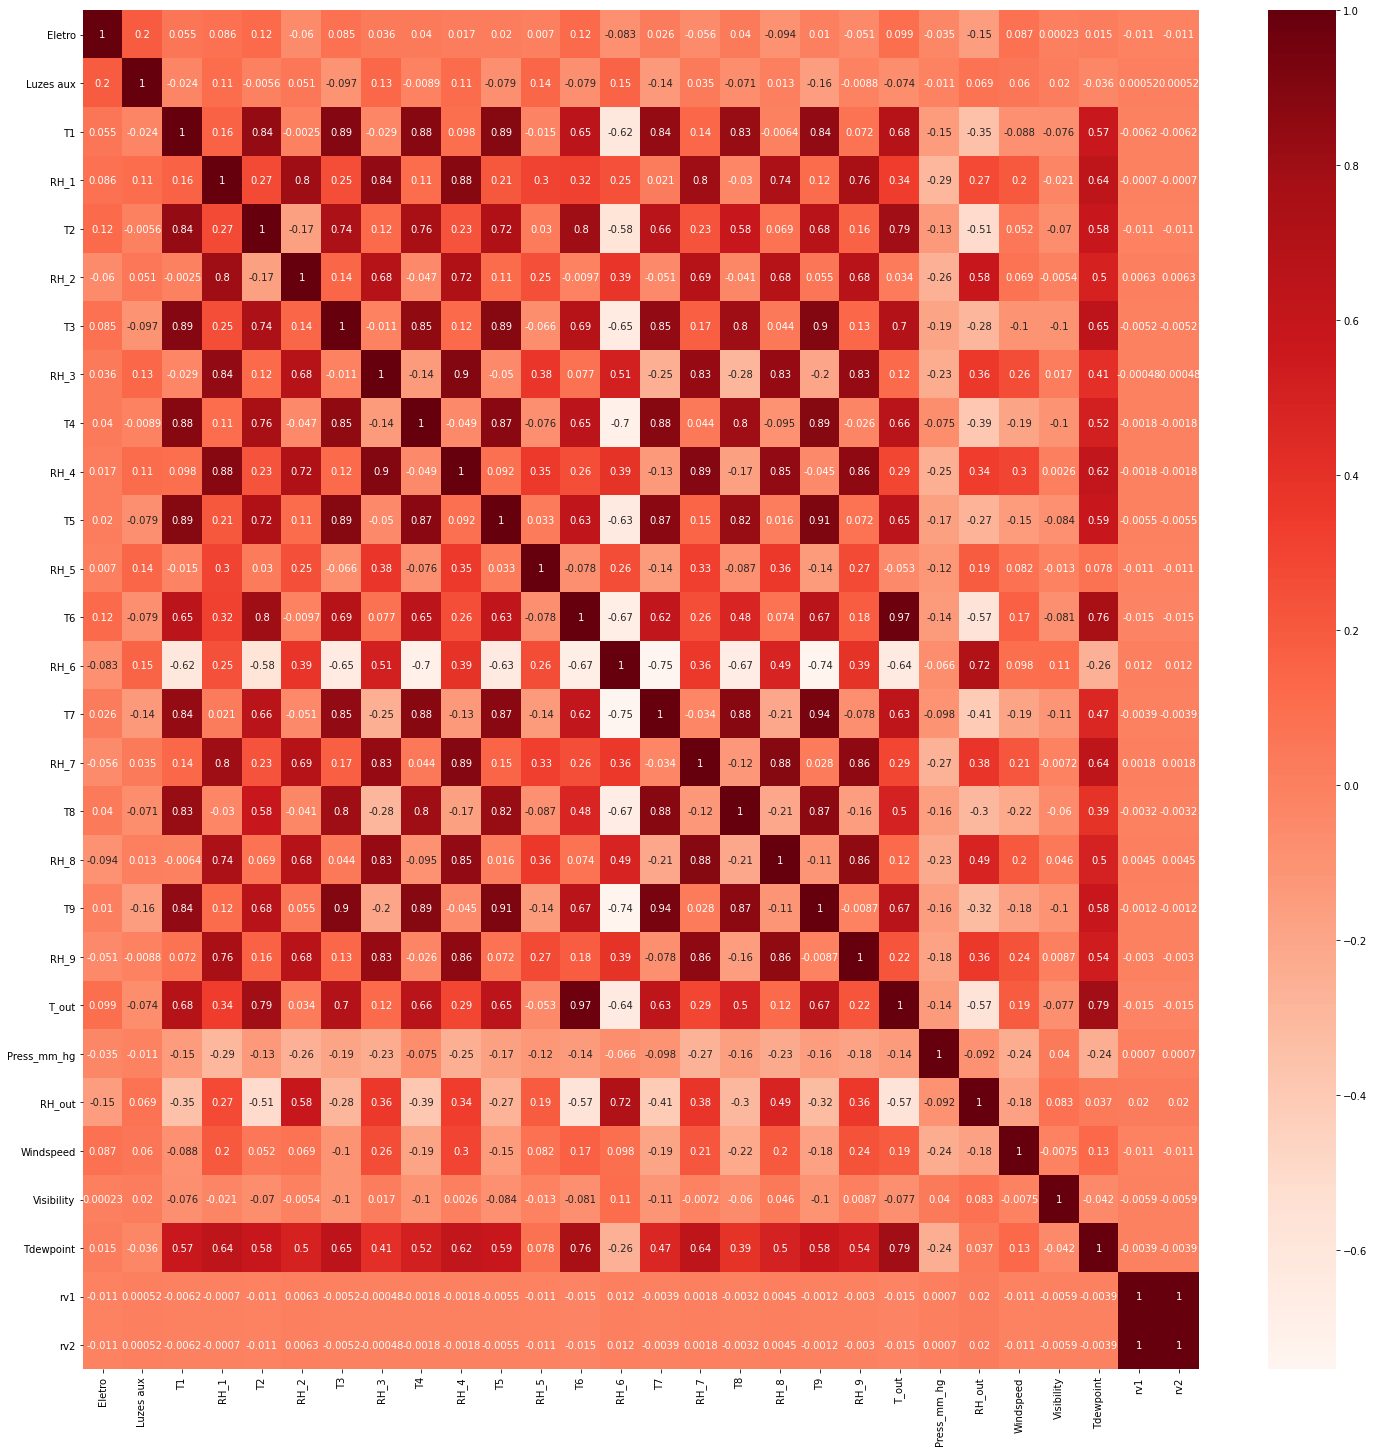

In [68]:
plt.figure(figsize=(25,25))
corr_matrix= df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Analisando as features (colunas)

In [84]:
df["Eletro"].nunique()

92

In [85]:
df["Eletro"].unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840])

In [94]:
df["Luzes aux"].unique()

array([30, 40, 50, 70, 60, 10, 20,  0])

<function matplotlib.pyplot.show>

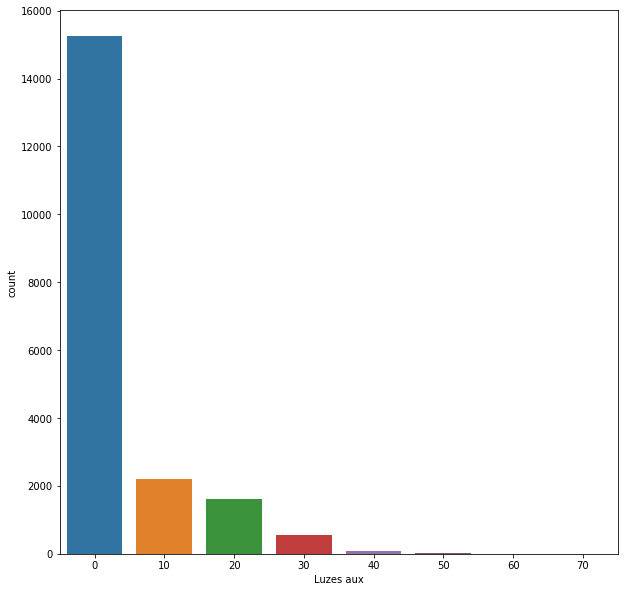

In [103]:
plt.figure(figsize=(10,10))
sns.countplot( x="Luzes aux", data= df)
plt.show

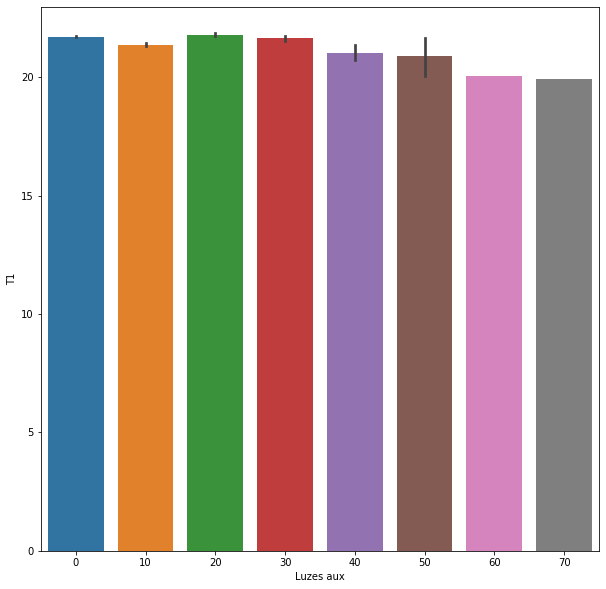

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(x=df["Luzes aux"], y=df["T1"])
plt.show()


Etapa 4 : Machine Lean

In [90]:
df.shape


(19735, 29)

In [76]:
amostra_df=df.sample(n=100)
amostra_df.shape

(100, 29)

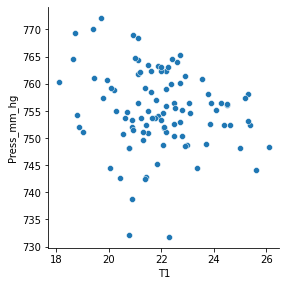

In [77]:
sns.pairplot(amostra_df, x_vars=["T1"],y_vars=["Press_mm_hg"], height=4, kind= "scatter")

In [78]:
df.head()


,date,Eletro,Luzes aux,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [83]:
x = df[['Eletro','Luzes aux']]


In [154]:
y = df[['T1','RH_1','T2','RH_2','T3','RH_3']]

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=32)

In [132]:
x_train.shape

(13814, 2)

In [133]:
x_test.shape

(5921, 2)

In [156]:
x_train.head()

,Eletro,Luzes aux
18268,30,0
10653,640,0
19029,130,0
8095,90,20
1001,40,0


In [157]:
y_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3
18268,23.790000,40.200000,26.000000,33.730000,24.39,37.590000
10653,22.500000,40.656667,20.230000,43.326667,24.29,38.096667
19029,24.890000,50.590000,23.356667,51.060000,25.79,45.466667
8095,21.200000,37.333333,19.000000,38.590000,21.39,36.400000
1001,19.323333,41.400000,18.200000,41.400000,19.60,40.590000


In [136]:
model = LinearRegression()

In [162]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
model.coef_

array([[ 0.001026  , -0.00827715],
       [ 0.0028156 ,  0.04617475],
       [ 0.00276713, -0.00924322],
       [-0.00275805,  0.03090899],
       [ 0.00213275, -0.03200996],
       [ 0.00046446,  0.05361314]])

In [166]:
model.intercept_

array([21.62056886, 39.81103045, 20.11390798, 40.56623817, 22.18296158,
       38.9890847 ])

In [167]:
model.score(x_test,y_test) 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.01237802134731197

In [168]:
df.head()

,date,Eletro,Luzes aux,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [181]:
Wh_Luzes = float(input("Luzes aux"))
Wh_Eletro = float(input("Eletro"))

Luzes aux50
Eletro50


In [182]:
Wh_Luzes

50.0

In [184]:
pred = model.predict([[Wh_Eletro,Wh_Luzes]])
print(pred)

[[21.25801171 42.26054796 19.79010386 41.97378523 20.689101   41.69296466]]
